In [10]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [11]:
a = 0
b = 8
h = 0.05
n = 100
def M(t):
    return 2 - 0.5*t

def K(t):
    return 2 / (1 + 9 * t**2)

In [22]:
k = int(b / h) + 1

Me = np.zeros(k)
Cov = np.zeros((k, k))

for i in range(k):
    Me[i] = M(i*h)
    for j in range(k):
        Cov[i, j] = K(h*(j-i))

eps = np.random.rand(k, n)

In [23]:
L = np.linalg.cholesky(Cov)
print(Cov)
print(L@L.T) # Правда

[[2.         1.95599022 1.83486239 ... 0.00355435 0.00350986 0.0034662 ]
 [1.95599022 2.         1.95599022 ... 0.0035997  0.00355435 0.00350986]
 [1.83486239 1.95599022 2.         ... 0.00364591 0.0035997  0.00355435]
 ...
 [0.00355435 0.0035997  0.00364591 ... 2.         1.95599022 1.83486239]
 [0.00350986 0.00355435 0.0035997  ... 1.95599022 2.         1.95599022]
 [0.0034662  0.00350986 0.00355435 ... 1.83486239 1.95599022 2.        ]]
[[2.         1.95599022 1.83486239 ... 0.00355435 0.00350986 0.0034662 ]
 [1.95599022 2.         1.95599022 ... 0.0035997  0.00355435 0.00350986]
 [1.83486239 1.95599022 2.         ... 0.00364591 0.0035997  0.00355435]
 ...
 [0.00355435 0.0035997  0.00364591 ... 2.         1.95599022 1.83486239]
 [0.00350986 0.00355435 0.0035997  ... 1.95599022 2.         1.95599022]
 [0.0034662  0.00350986 0.00355435 ... 1.83486239 1.95599022 2.        ]]


In [25]:
nu = L@eps
psi = nu + Me.reshape(-1, 1)
print(psi)
print(psi.shape)

[[2.10734681 2.17622456 2.23067522 ... 3.2363171  2.65295946 2.10989705]
 [2.35671764 2.25217638 2.3088981  ... 3.24414327 2.7537135  2.31871009]
 [2.57631513 2.42229604 2.36986711 ... 3.21973454 2.90994729 2.51857056]
 ...
 [2.09150537 1.64725016 0.50505392 ... 1.13734604 1.60775082 1.18781867]
 [2.20266135 1.73100362 0.55067943 ... 1.12072794 1.42494433 1.26682161]
 [2.30151553 1.75422268 0.58417645 ... 1.16772335 1.22075004 1.36667146]]
(161, 100)


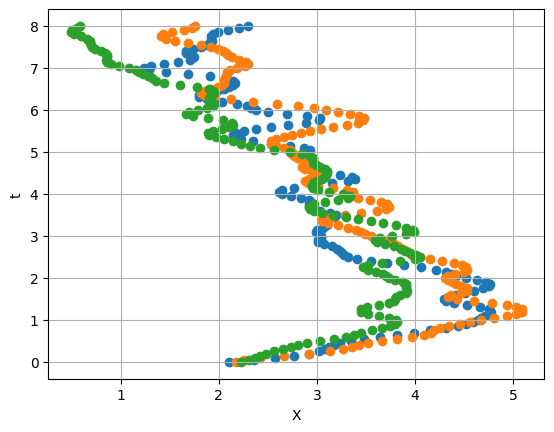

In [30]:
t = np.linspace(a, b, k)
for i in range(3):
    plt.scatter(psi[:, i], t)
    plt.xlabel("X")
    plt.ylabel("t")
    
plt.grid(True)
plt.show()

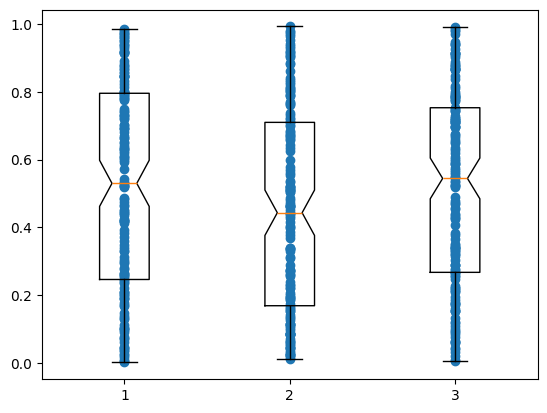

In [40]:
t1, t3, t100 = eps[:, 0], eps[:, 2], eps[:, 99]
plt.boxplot([t1, t3, t100], ['1', '3', '100'])
plt.scatter([[1 for i in range(t1.shape[0])], [2 for i in range(t1.shape[0])], [3 for i in range(t1.shape[0])]], [t1, t3, t100])